lamda: 1
k: 3
0.981011843124


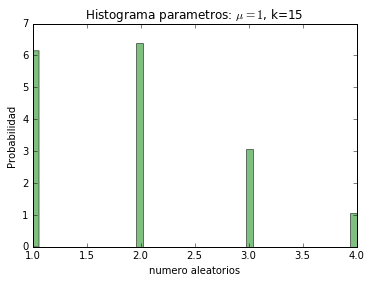

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import numpy as np

def  cong(x0):
    a = 1664525
    b = 1013904223
    m = 2**32
    xi = x0
    ui =0
    xi = (a*xi + b)%(m)
    ui = float(xi)/float(m)

    return xi,ui


distribucion = [0.05,0.15,0.3,0.3,0.15,0.05]

def acumulada(dis):
    acum = []
    for x in range(len(dis)):
        if(x == 0):
            acum.append(dis[x])
        else:
            suma = acum[x-1]+dis[x]
            acum.append(suma)
        
    return acum

def inversion(acum,semilla,itera):
    inver = []
    xi = semilla
    for i in range(itera):
        xi,random = cong(xi)
        for x in range(len(acum)):
            if(random <=acum[x]):
                inver.append(x+1) 
                break
    return inver
        
def  generarPoisson(lamda,k):
    poisson = []
    for i in range(k+1):
        a = (math.exp(-lamda)*lamda**i)
        fac = factorial(i)        
        poisson.append(a/fac)
    return poisson

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

lamda =int(input("lamda: "))
k =int(input("k: "))
fxPoisson = generarPoisson(lamda,k)
print(np.sum(fxPoisson))
acum = acumulada(fxPoisson)

semilla = 5
metodo_inversion = inversion(acum,semilla,10000)
num_bins = 50
n, bins, patches = plt.hist(metodo_inversion, num_bins, normed=1, facecolor='green', alpha=0.5)
mu = lamda  
sigma = 1  


plt.xlabel('numero aleatorios')
plt.ylabel('Probabilidad')
plt.title(r'Histograma parametros: $\mu='+str(lamda)+'$, k=15')


plt.subplots_adjust(left=0.15)
plt.show()
